In [13]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline

In [3]:
data = pd.read_csv(r'C:\Users\dell\Downloads\improved_disease_dataset.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fever        2000 non-null   int64 
 1   headache     2000 non-null   int64 
 2   nausea       2000 non-null   int64 
 3   vomiting     2000 non-null   int64 
 4   fatigue      2000 non-null   int64 
 5   joint_pain   2000 non-null   int64 
 6   skin_rash    2000 non-null   int64 
 7   cough        2000 non-null   int64 
 8   weight_loss  2000 non-null   int64 
 9   yellow_eyes  2000 non-null   int64 
 10  disease      2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB


In [5]:
encoder = LabelEncoder()
data["disease"] = encoder.fit_transform(data["disease"])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   fever        2000 non-null   int64
 1   headache     2000 non-null   int64
 2   nausea       2000 non-null   int64
 3   vomiting     2000 non-null   int64
 4   fatigue      2000 non-null   int64
 5   joint_pain   2000 non-null   int64
 6   skin_rash    2000 non-null   int64
 7   cough        2000 non-null   int64
 8   weight_loss  2000 non-null   int64
 9   yellow_eyes  2000 non-null   int64
 10  disease      2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


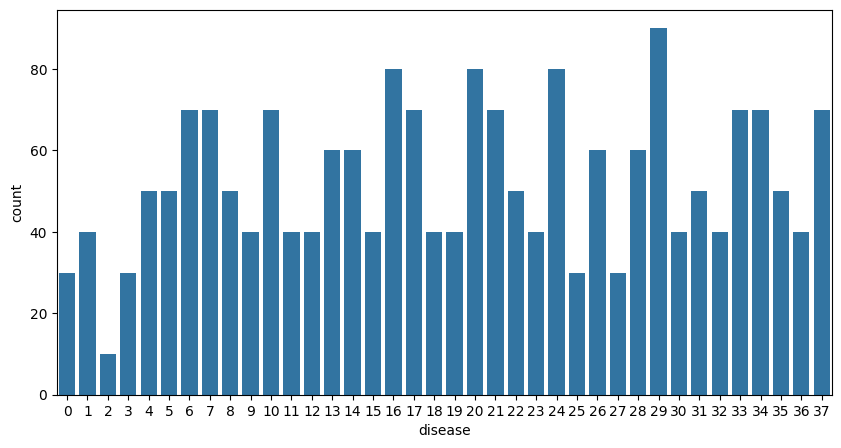

In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
plt.figure(figsize = (10,5))
sns.countplot(x=y)
plt.show()

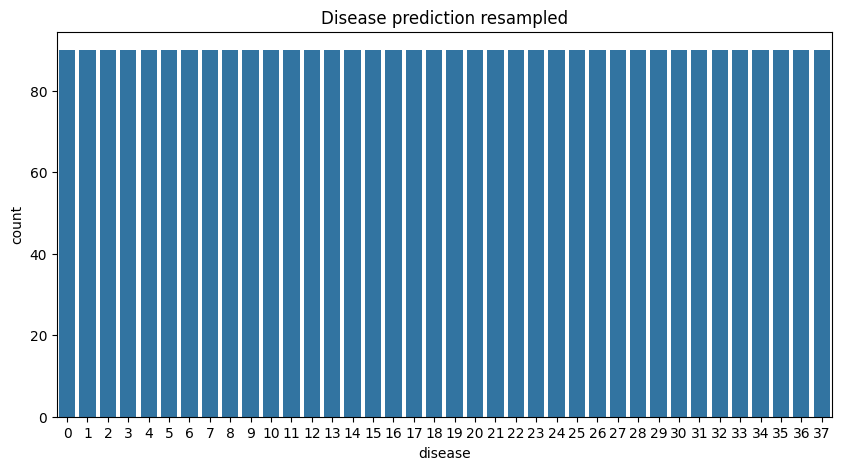

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
ros = RandomOverSampler(random_state = 42)
X_resampled, y_resampled = ros.fit_resample(X,y)

plt.figure(figsize = (10,5))
sns.countplot(x=y_resampled)
plt.title("Disease prediction resampled")
plt.show()

In [9]:
X_resampled = X_resampled.fillna(0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   fever        2000 non-null   int64
 1   headache     2000 non-null   int64
 2   nausea       2000 non-null   int64
 3   vomiting     2000 non-null   int64
 4   fatigue      2000 non-null   int64
 5   joint_pain   2000 non-null   int64
 6   skin_rash    2000 non-null   int64
 7   cough        2000 non-null   int64
 8   weight_loss  2000 non-null   int64
 9   yellow_eyes  2000 non-null   int64
 10  disease      2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [11]:
if len(y_resampled.shape)>1:
    y_resampled = y_resampled.values.ravel()

In [24]:
models = {
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "SVM" : SVC()
}

In [25]:
cv_scoring = 'accuracy'
stratified_Kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [26]:
for model_name, model in models.items():
    try:
        scores = cross_val_score(
            model,
            X_resampled,
            y_resampled,
            cv = stratified_Kfold,
            scoring = cv_scoring,
            n_jobs=-1,
            error_score = 'raise'
        )
        print("=" *50)
        print(f"Model: {model_name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.5f}")
    except Exception as e:
        print("="*50)
        print(f"Model: {model_name} Failed with error")
        print(e)

Model: Decision Tree
Scores: [0.5497076  0.54532164 0.53508772 0.53654971 0.52631579]
Mean Accuracy: 0.53860
Model: Random Forest
Scores: [0.57748538 0.54239766 0.54093567 0.53947368 0.51754386]
Mean Accuracy: 0.54357
Model: SVM
Scores: [0.51315789 0.51169591 0.49707602 0.48245614 0.49561404]
Mean Accuracy: 0.50000


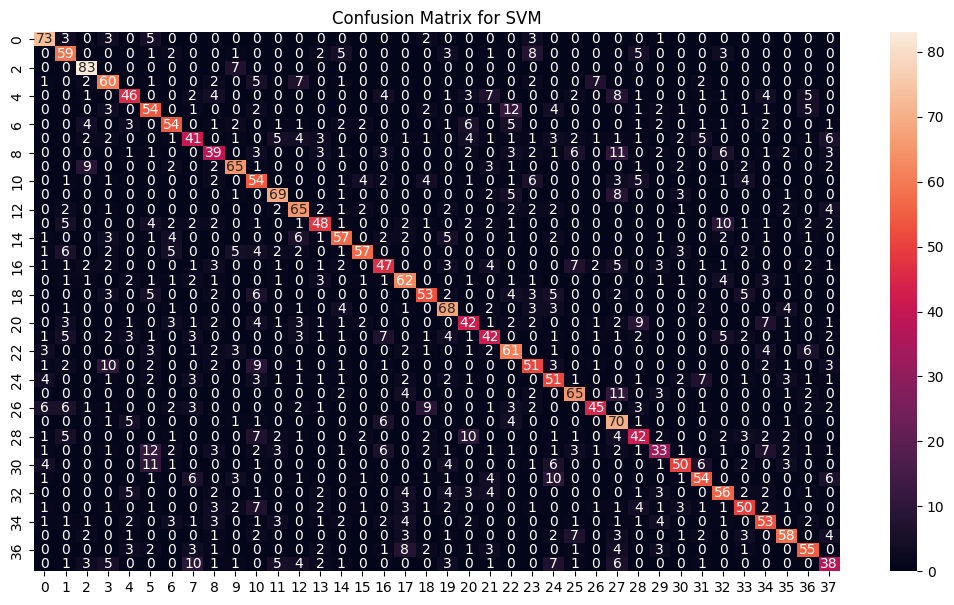

Model Accuracy: 60.5263%


In [37]:
# Checking accuracy for SVM model
svm_model = SVC()
svm_model.fit(X_resampled,y_resampled)
svm_preds = svm_model.predict(X_resampled)

cf_matrix_svm = confusion_matrix(y_resampled, svm_preds)
plt.figure(figsize = (13,7))
plt.title("Confusion Matrix for SVM")
sns.heatmap(cf_matrix_svm,annot = True)
plt.show()
print(f"Model Accuracy: {accuracy_score(y_resampled, svm_preds)*100:.4f}%")

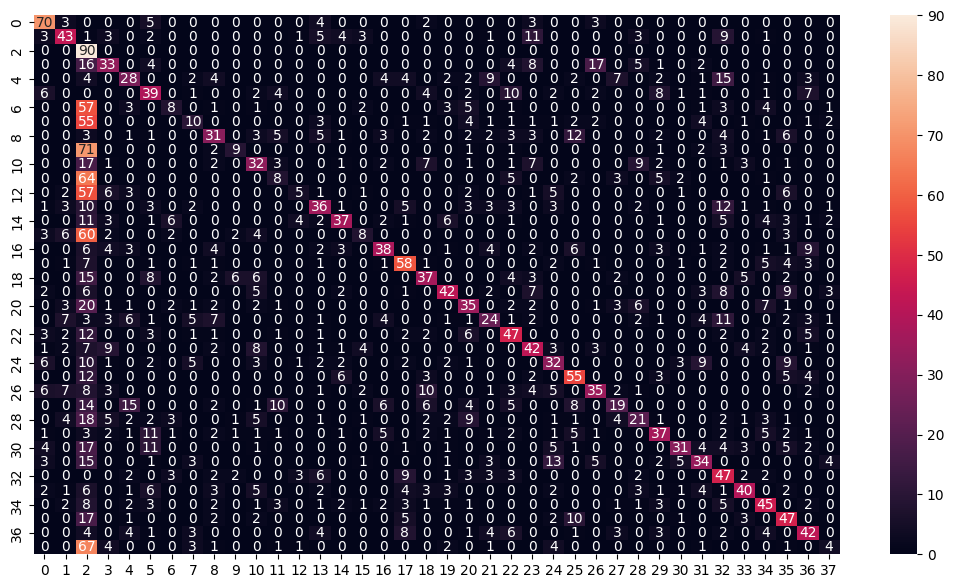

Model Accuracy: 37.9825%


In [41]:
# Checking accuracy for Gaussian Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)
nb_preds = nb_model.predict(X_resampled)

cf_matrix_nb = confusion_matrix(y_resampled, nb_preds)
plt.figure(figsize = (13,7))
sns.heatmap(cf_matrix_nb, annot = True)
plt.show()
print(f"Model Accuracy: {accuracy_score(y_resampled,nb_preds) * 100:.4f}%")

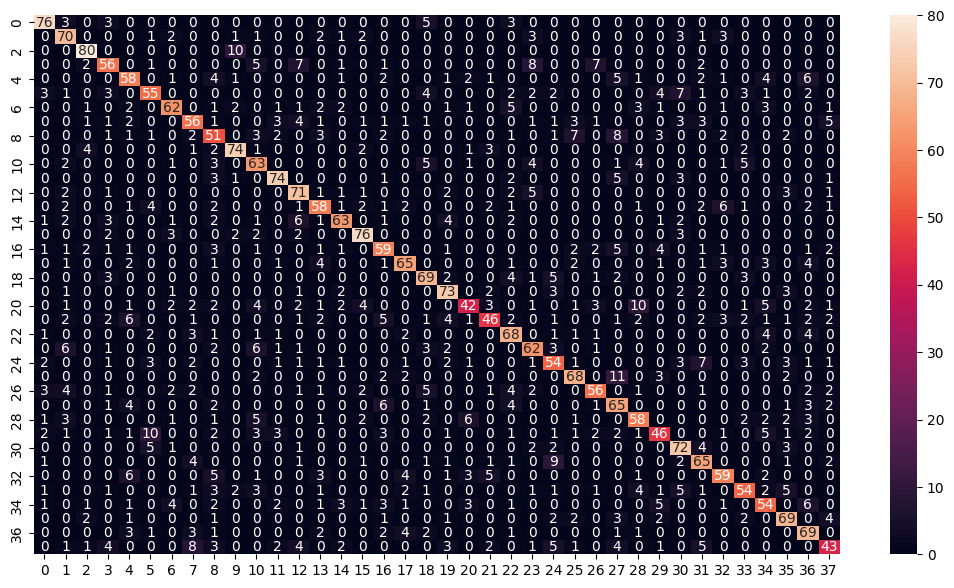

Model Accuracy: 68.9766%


In [42]:
# Confusion Matrix for randome foresr algorithm
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_resampled, y_resampled)
rf_preds = rf_model.predict(X_resampled)

cf_matrix_rf = confusion_matrix(y_resampled,rf_preds)
plt.figure(figsize = (13,7))
sns.heatmap(cf_matrix_rf, annot = True)
plt.show()
print(f"Model Accuracy: {accuracy_score(y_resampled,rf_preds)*100:.4f}%")


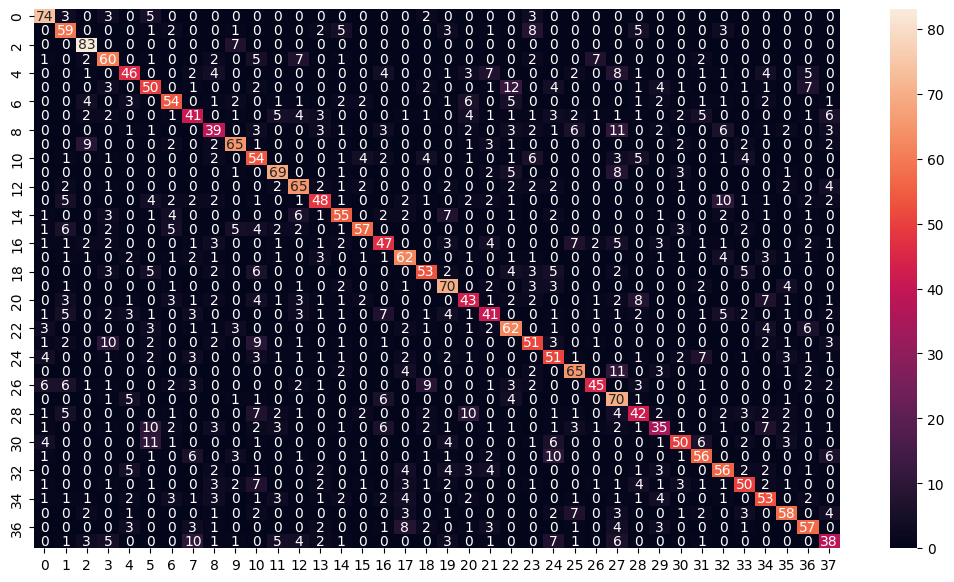

Model Accuracy: 60.6433%


In [46]:
# Combined Confusion Matrix of models for Combinde accuracy
from statistics import mode
final_preds = [mode([i,j,k]) for i,j,k in zip(svm_preds,rf_preds,nb_preds)]

cf_matrix_final = confusion_matrix(y_resampled, final_preds)
plt.figure(figsize = (13,7))
sns.heatmap(cf_matrix_final, annot = True)
plt.show()
print(f"Model Accuracy: {accuracy_score(y_resampled, final_preds)*100:.4f}%")

In [51]:
# Creating Predicion Function
symptoms = X.columns.values
symptom_index = {symptom: idx for idx, symptom in enumerate(symptoms)}

# define Prediction Function
def predict_disease(input_symptoms):
    input_symptoms = input_symptoms.split(",")
    input_data = [0]*len(symptom_index)

    for symptom in input_symptoms:
        if symptom in symptom_index:
            input_data[symptom_index[symptom]] = 1

    input_df = pd.DataFrame([input_data], columns = symptoms)

    rf_pred = encoder.classes_[rf_model.predict(input_df)[0]]
    nb_pred = encoder.classes_[nb_model.predict(input_df)[0]]
    svm_pred = encoder.classes_[svm_model.predict(input_df)[0]]

    final_pred = mode([rf_pred,nb_pred,svm_pred])

    return {
        "Random Forest Prediction" : rf_pred,
        "Naiva Bayes Prediction" : nb_pred,
        "SVM Prediction": svm_pred,
        "Final prediction": final_pred
    }
    
print(predict_disease("skin_rash,fever,headache"))


# This output shows that the Random Forest and SVM models both predict "Peptic ulcer disease", while
# the Naive Bayes model predicts "Impetigo" for the given symptoms. Since the majority of models agree
# on "Peptic ulcer disease," it is chosen as the final prediction. This suggests that "Peptic ulcer disease" is
# the most likely diagnosis based on the input symptoms according to the ensemble of models.

{'Random Forest Prediction': 'Peptic ulcer disease', 'Naiva Bayes Prediction': 'Impetigo', 'SVM Prediction': 'Peptic ulcer disease', 'Final prediction': 'Peptic ulcer disease'}
